# U.S. Medical Insurance Costs

### Intro

In this project, we investigate a medical insurance costs dataset using Python. The goal is to analyze the data and gain insights into patient demographics and insurance costs. Here are the questions we aim to answer:


- What is average age of the patients in the dataset?
- Where a majority of the individuals are from?
- How do the costs compare between smokers and non-smokers?
- What the average age is for someone who has at least one child in this dataset?

### Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
insurance_info = pd.read_csv('insurance.csv')

### Data Inspection

In [3]:
# Overview of the dataset
insurance_info.info()
insurance_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Check for duplicate rows
duplicates_count = insurance_info.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 1


### Summary Statistics

In [17]:
# Encode categorical variables into dummy variables for statistical analysis
# This creates separate binary columns for 'sex', 'smoker', and 'region', excluding the first category to avoid multicollinearity
df_encoded = pd.get_dummies(insurance_info, columns=['sex', 'smoker', 'region'], drop_first=True)

In [18]:
# Display the first few rows of the encoded dataframe
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [16]:
# Generate summary statistics for numerical columns in the dataset
df_encoded.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check categorical distributions
insurance_info['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Additional Insights
The correlation heatmap provides an overview of the relationships between numerical variables in the dataset. A high positive or negative correlation indicates a strong relationship between variables. For example, we can observe how `charges` are influenced by other variables such as `age`, `bmi`, and `children`. This visualization helps identify key factors affecting insurance costs.

/var/folders/47/pz19j_l97wg2_dgw3_lyhg4w0000gn/T/ipykernel_40804/1744722591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance_info.corr(), annot=True, cmap='coolwarm', fmt='.2f')


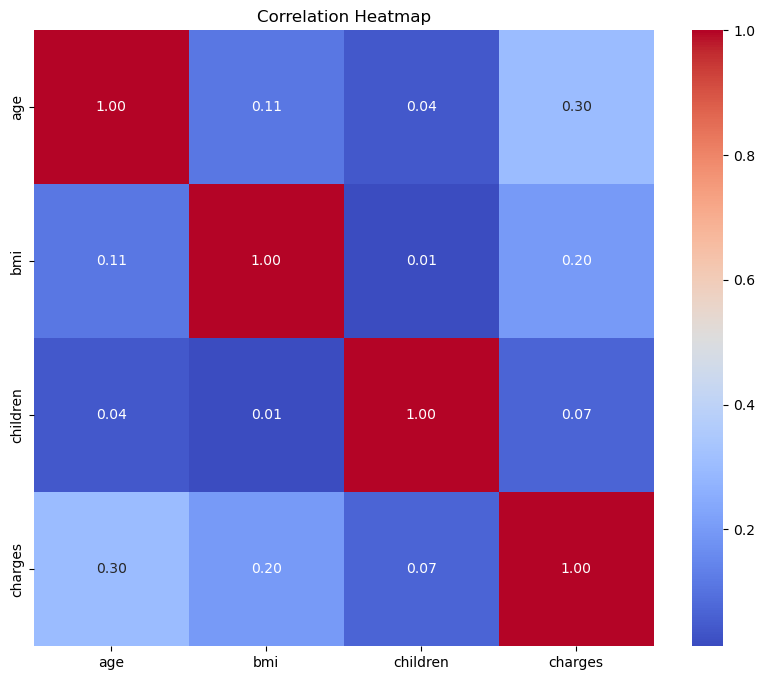

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_info.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Questions and Answers

#### What is the average age of the patients in the dataset?

In [7]:
# Function to calculate the average age
def calculate_average_age(data):
    return data.age.mean()
print(f"Average age of the patients:{round(calculate_average_age(insurance_info))}")

Average age of the patients:39


#### Where a majority of the individuals are from?

In [8]:
# Function to calculate region distribution
def region_distribution(data):
       return data['region'].value_counts()

region_counts = region_distribution(insurance_info)
print("Patients per region:\n", region_counts)

Patients per region:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


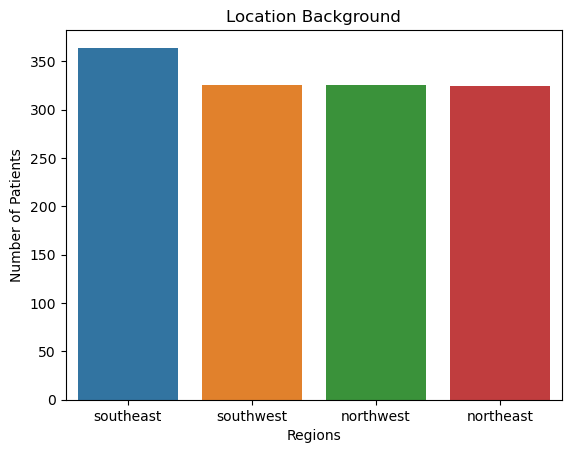

In [9]:
# Visualization
order = insurance_info['region'].value_counts().index
plt.title('Location Background')
sns.countplot( data = insurance_info, x= 'region', order=order)
plt.xlabel('Regions')
plt.ylabel('Number of Patients')
plt.show()

#### How do the costs compare between smokers and non-smokers?

In [10]:
# Function to compare costs
def smoker_cost_comparison(data):
    return data.groupby('smoker')['charges'].describe()

smoker_costs = smoker_cost_comparison(insurance_info)
print("Cost comparison between smokers and non-smokers:\n", smoker_costs)

Cost comparison between smokers and non-smokers:
          count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


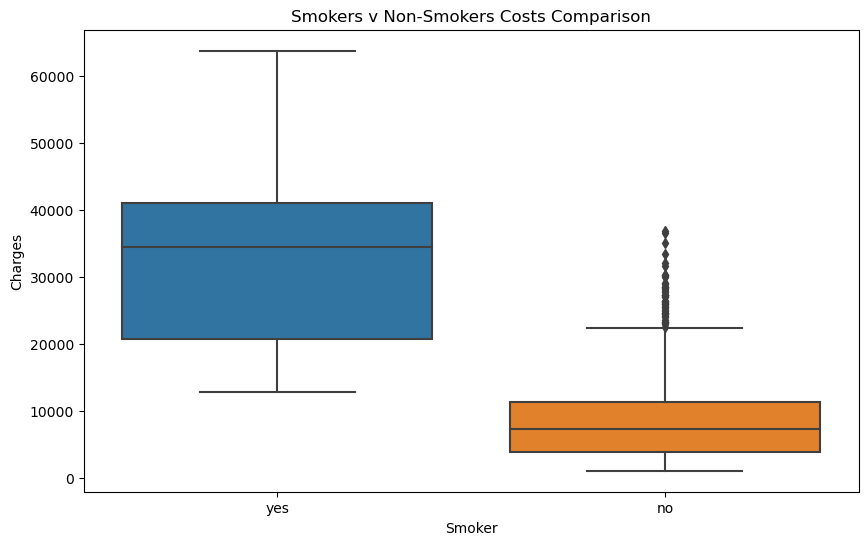

In [11]:
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='smoker', y='charges', data=insurance_info)
    plt.title('Smokers v Non-Smokers Costs Comparison')
    plt.xlabel('Smoker')
    plt.ylabel('Charges')
    plt.show()

#### What the average age is for someone who has at least one child in this dataset?

In [12]:
# Function to calculate average age of patients with children
def average_age_with_children(data):
    return data[data['children'] >= 1].age.mean()
print(f"Average age is for someone who has at least one child: {round(average_age_with_children(insurance_info))}")

Average age is for someone who has at least one child: 40


### Conclusion
- The average age of patients is approximately **39 years**.
- A majority of the individuals are from the **Southeast** region.
- Smokers incur significantly higher insurance charges than non-smokers, as shown by both descriptive statistics and visualization.
- The average age of individuals with at least one child is approximately **40 years**, which aligns with the overall average age.

This analysis provides a deeper understanding of the dataset and highlights key factors influencing insurance costs.
